In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec

from Bio import Phylo
import numpy as np

import glob,os,copy,requests
from io import StringIO

import baltic as bt

# address='https://raw.githubusercontent.com/evogytis/fluB/master/data/mcc%20trees/InfB_NPt_ALLs1.mcc.tre' ## address of example tree
address='https://raw.githubusercontent.com/evogytis/fluB/master/data/mcc%20trees/InfB_HAt_ALLs1.mcc.tre' ## address of example tree

fetch_tree = requests.get(address) ## fetch tree
treeFile=StringIO(fetch_tree.text) ## stream from repo copy

ll=bt.loadNexus(treeFile,tip_regex='_([0-9\-]+)$') ## treeFile here can alternatively be a path to a local file

ll.treeStats()
print('Done!')


Tree height: 30.415856
Tree length: 449.376345
strictly bifurcating tree
annotations present

Numbers of objects in tree: 903 (451 nodes and 452 leaves)

Done!


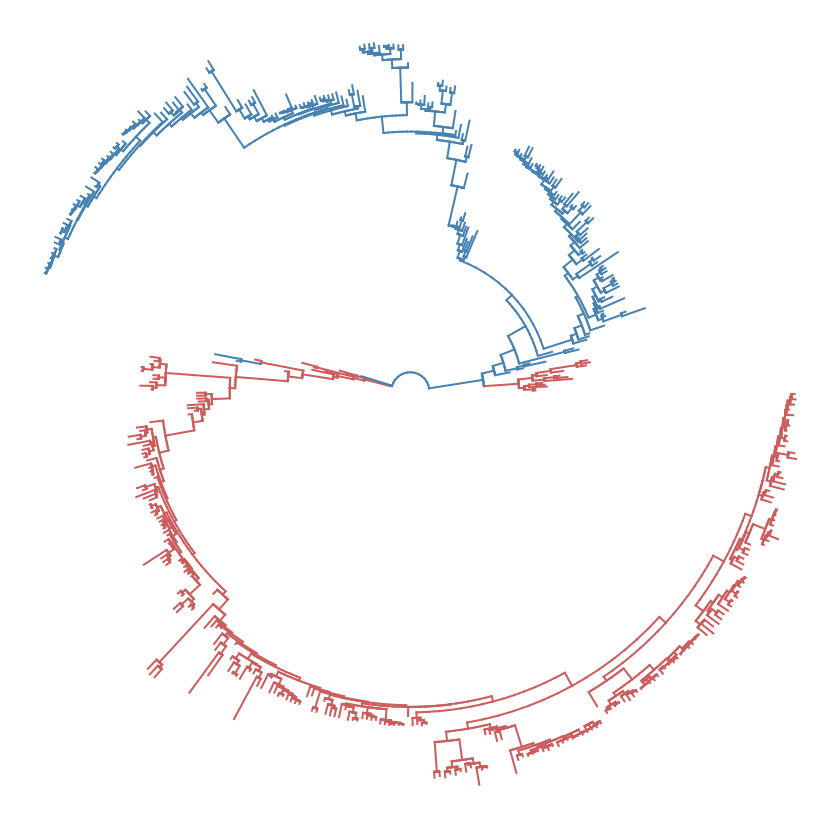

In [2]:
fig = plt.subplots(figsize=(15,15),facecolor='w')

gs = gridspec.GridSpec(1, 1,hspace=0.0,wspace=0.0)
ax = plt.subplot(gs[0])

traitName='PB1'
c_func=lambda k: 'indianred' if k.traits[traitName]=='V' else 'steelblue'

ll.plotCircularTree(ax,circStart=0.25,circFrac=1.0,colour=c_func,inwardSpace=0.05*ll.treeHeight) ## tree starts a quarter of the way through a circle and occupies its entirety, 5% of tree height is left as space from center, inward space is positive, therefore tree radiates outwards

ax.plot()

[ax.spines[loc].set_visible(False) for loc in ax.spines]
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_aspect(1)
plt.show()

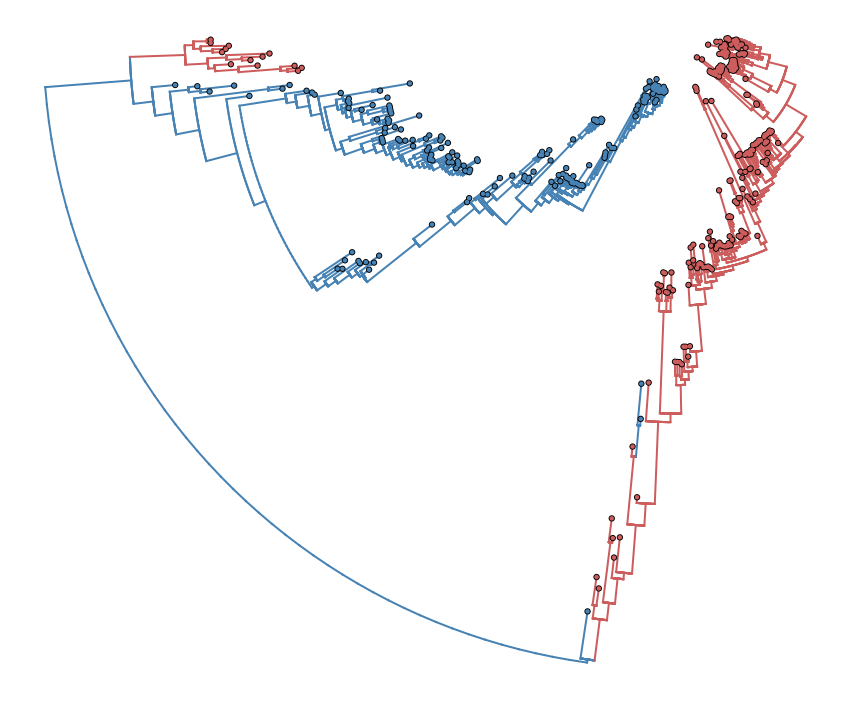

In [3]:
fig = plt.subplots(figsize=(15,15),facecolor='w')

gs = gridspec.GridSpec(1, 1,hspace=0.0,wspace=0.0)
ax = plt.subplot(gs[0])

traitName='PB1'
c_func=lambda k: 'indianred' if k.traits[traitName]=='V' else 'steelblue'

ll.plotCircularTree(ax,circStart=0.75,circFrac=0.5,colour=c_func,inwardSpace=-0.05*ll.treeHeight,precision=50) ## tree starts 0.75 of the way through the circle and occupies half of it, 5% of tree height is left as space in the middle, because inward space is negative the tree radiates inwards
ll.plotCircularPoints(ax,circStart=0.75,circFrac=0.5,colour=c_func,inwardSpace=-0.05*ll.treeHeight,size=20)

ax.plot()

[ax.spines[loc].set_visible(False) for loc in ax.spines]
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_aspect(1)
plt.show()